<a href="https://colab.research.google.com/github/highway92/machine_learning/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C/2_%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EC%98%88%EC%A0%9C%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
titanic_df = pd.read_csv("./train.csv")
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [9]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [10]:
# null 값에 대한 처리를 해준다.
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna("N", inplace=True)
titanic_df['Embarked'].fillna("N", inplace=True)
print('데이터 세트 null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 null 값 개수 0


In [11]:
print('Sex 값 분포:\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포: 
 N              687
G6               4
C23 C25 C27      4
B96 B98          4
D                3
              ... 
A26              1
T                1
C148             1
C46              1
A24              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [12]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

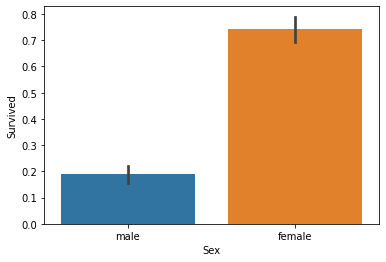

In [13]:
sns.barplot(x='Sex',y='Survived',data = titanic_df)

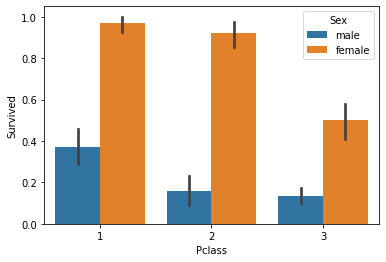

In [14]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

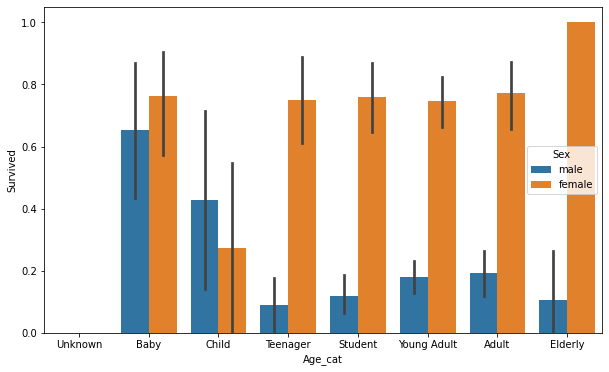

In [15]:
def get_category(age):
  cat=""
  if age<= -1 : cat = "Unknown"
  elif age<=5 : cat = "Baby"
  elif age<=12 : cat = 'Child'
  elif age <=18 : cat = 'Teenager'
  elif age <= 25 : cat = 'Student'
  elif age <= 35 : cat = 'Young Adult'
  elif age <= 60 : cat = 'Adult'
  else : cat = 'Elderly'

  return cat

plt.figure(figsize=(10,6))
group_name = ["Unknown","Baby",'Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x="Age_cat",y='Survived',hue='Sex',data=titanic_df, order=group_name)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [16]:
from sklearn import preprocessing

def encode_features(dataDF):
  dataDF['Cabin'] = dataDF['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [31]:
def fillna(df):
  df['Age'].fillna(df['Age'].mean(),inplace=True)
  df['Cabin'].fillna("N", inplace=True)
  df['Embarked'].fillna("N", inplace=True)
  df['Fare'].fillna(0,inplace=True)
  return df

def drop_features(df):
  df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
  return df

def format_features(df):
  df['Cabin'] = df['Cabin'].str[:1]
  features=['Cabin','Sex','Embarked']
  for feature in features:
    le = preprocessing.LabelEncoder()
    le = le.fit(df[feature].astype('str'))
    df[feature] = le.transform(df[feature])
  return df

def transform_features(df):
  df = fillna(df)
  df = drop_features(df)
  df = format_features(df)
  return df

In [33]:
from sklearn import preprocessing

titanic_df = pd.read_csv("./train.csv")

y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)
X_titanic_df = transform_features(X_titanic_df)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0
2,3,0,26.0,0,0,7.9250,7,3
3,1,0,35.0,1,0,53.1000,2,3
4,3,1,35.0,0,0,8.0500,7,3


In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df, y_titanic_df,test_size=0.2,random_state=11)

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [40]:
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassfier 정확도:{0:.4f}'.format(accuracy_score(y_test,dt_pred)))


rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassfier 정확도:0.7877
RandomForestClassifier 정확도 : 0.8547
LogisticRegression 정확도 : 0.8492


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [43]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 kfold 객체를 생성, 폴드 수 만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits=folds)
  scores=[]

  #KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train,X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train,y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

    # Classifier 학습 예측 정확도 계산
    clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test,predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count+1,accuracy))

  mean_score = np.mean(scores)
  print("평균 정확도 : {0:.4f}".format(mean_score))

exec_kfold(dt_clf)

교차 검증 1 정확도 : 0.7542
교차 검증 2 정확도 : 0.7809
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.7697
교차 검증 5 정확도 : 0.8202
평균 정확도 : 0.7823


In [44]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count+1, accuracy))

print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

교차 검증 1 정확도 : 0.7430
교차 검증 2 정확도 : 0.7753
교차 검증 3 정확도 : 0.7921
교차 검증 4 정확도 : 0.7865
교차 검증 5 정확도 : 0.8427
평균 정확도 : 0.7879


In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이터 파라미터 :', grid_dclf.best_params_)
print('GridSearchCv 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이터 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCv 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
